# Random Forest Classifier

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import itertools

## Plot Confusion matrix code

In [7]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
        https://stackoverflow.com/a/50386871
    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## Get Metrics code

In [ ]:
def get_metrics(Y_test, Y_predicted):
    report = classification_report(Y_test, Y_predicted, output_dict=True)['weighted avg']
    report.pop('support', None)
    conf_mat = confusion_matrix(Y_test, Y_predicted)
    FP = conf_mat.sum(axis=0) - np.diag(conf_mat)  
    FN = conf_mat.sum(axis=1) - np.diag(conf_mat)
    TP = np.diag(conf_mat)
    TN = conf_mat.sum() - (FP + FN + TP)
    TPR = TP/(TP+FN)
    FPR = FP/(FP+TN)
    report['TP Rate'] = sum(TPR) / len(TPR)
    report['FP Rate'] = sum(FPR) / len(FPR)
    return report

## Load pickles dataset

In [12]:
# the data-preprocessing notebook should be run before

full_set = pd.read_pickle("../../data/processed/full_set.pkl")
full_set_x = full_set.drop(['target'], axis=1)
full_set_y = full_set['target']

train_set = pd.read_pickle("../../data/processed/train_set.pkl")
train_set_x = train_set.drop(['target'], axis=1)
train_set_y = train_set['target']

test_set = pd.read_pickle("../../data/processed/test_set.pkl")
test_set_x = test_set.drop(['target'], axis=1)
test_set_y = test_set['target']

train_set_30 = pd.read_pickle("../../data/processed/train_set_30.pkl")
train_set_30_x = train_set_30.drop(['target'], axis=1)
train_set_30_y = train_set_30['target']

test_set_30 = pd.read_pickle("../../data/processed/test_set_30.pkl")
test_set_30_x = test_set_30.drop(['target'], axis=1)
test_set_30_y = test_set_30['target']

train_set_70 = pd.read_pickle("../../data/processed/train_set_70.pkl")
train_set_70_x = train_set_70.drop(['target'], axis=1)
train_set_70_y = train_set_70['target']

test_set_70 = pd.read_pickle("../../data/processed/test_set_70.pkl")
test_set_70_x = test_set_70.drop(['target'], axis=1)
test_set_70_y = test_set_70['target']

## Classify

### Training & Testing datasets

In [50]:
clf = RandomForestClassifier(random_state=42, n_estimators=100)
np.mean(cross_val_score(clf, full_set_x, full_set_y, cv=10))

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

0.9793

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       335
           1       0.92      0.91      0.92       350
           2       1.00      1.00      1.00       339
           3       0.98      0.97      0.98       332
           4       0.98      0.96      0.97       324
           5       0.98      0.98      0.98       308
           6       1.00      0.99      0.99       338
           7       0.99      1.00      1.00       316
           8       0.99      0.98      0.98       322
           9       0.99      1.00      0.99       336

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300



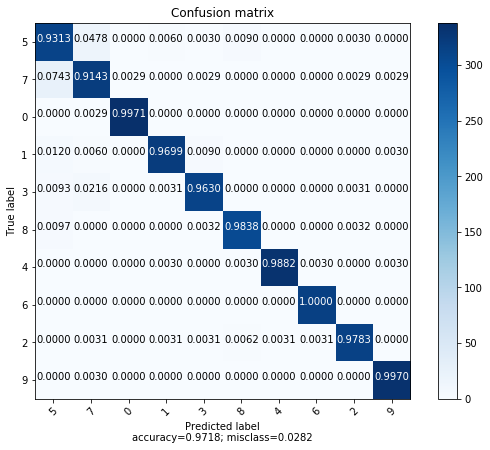

{'precision': 0.9721214885972366, 'recall': 0.9718181818181818, 'f1-score': 0.9719178000649927, 'TP Rate': 0.9722738219724316, 'FP Rate': 0.0031376216132889233}


In [56]:
clf.fit(train_set_x, train_set_y)
predict_set_y = clf.predict(test_set_x)
print(classification_report(test_set_y, predict_set_y))
conf_mat = confusion_matrix(test_set_y, predict_set_y)
plot_confusion_matrix(conf_mat, target_names=train_set_y.unique())
print(get_metrics(test_set_y, predict_set_y))

### Overt-fitting example

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       520
           1       0.96      0.95      0.96       543
           2       1.00      0.99      1.00       530
           3       1.00      0.99      0.99       536
           4       0.99      0.99      0.99       544
           5       0.98      0.99      0.99       533
           6       1.00      1.00      1.00       519
           7       0.99      1.00      1.00       509
           8       1.00      0.99      1.00       515
           9       1.00      1.00      1.00       531

    accuracy                           0.99      5280
   macro avg       0.99      0.99      0.99      5280
weighted avg       0.99      0.99      0.99      5280



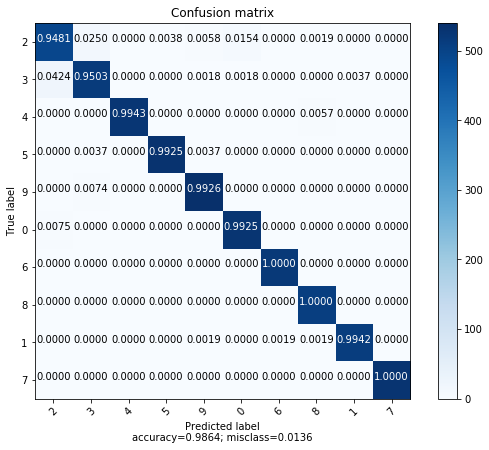

{'precision': 0.9863403601742307, 'recall': 0.9863636363636363, 'f1-score': 0.986339997840652, 'TP Rate': 0.9864547227918754, 'FP Rate': 0.0015156571702568324}


In [57]:
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(train_set_30_x, train_set_30_y)
predict_set_y = clf.predict(test_set_30_x)
print(classification_report(test_set_30_y, predict_set_y))
conf_mat = confusion_matrix(test_set_30_y, predict_set_y)
plot_confusion_matrix(conf_mat, target_names=train_set_30_y.unique())
print(get_metrics(test_set_30_y, predict_set_y))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       793
           1       0.88      0.94      0.91       795
           2       0.99      0.96      0.98       807
           3       0.99      0.98      0.98       808
           4       0.97      0.95      0.96       806
           5       0.97      0.99      0.98       787
           6       0.99      1.00      1.00       761
           7       0.95      0.99      0.97       796
           8       0.99      0.97      0.98       782
           9       1.00      0.99      0.99       785

    accuracy                           0.97      7920
   macro avg       0.97      0.97      0.97      7920
weighted avg       0.97      0.97      0.97      7920



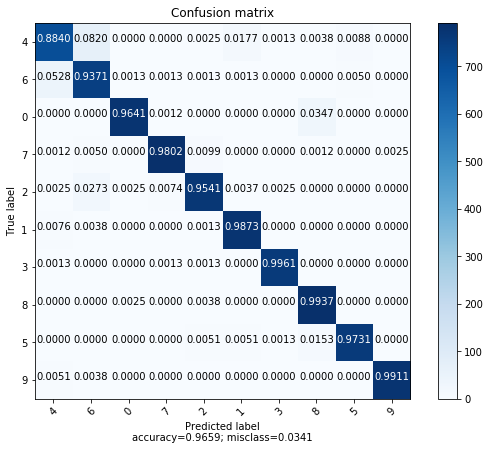

{'precision': 0.9664550449912332, 'recall': 0.9659090909090909, 'f1-score': 0.9659556392727556, 'TP Rate': 0.9660747048538214, 'FP Rate': 0.0037891896822465727}


In [58]:
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(train_set_70_x, train_set_70_y)
predict_set_y = clf.predict(test_set_70_x)
print(classification_report(test_set_70_y, predict_set_y))
conf_mat = confusion_matrix(test_set_70_y, predict_set_y)
plot_confusion_matrix(conf_mat, target_names=train_set_70_y.unique())
print(get_metrics(test_set_70_y, predict_set_y))

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best params for accuracy_score
{'min_samples_split': 10, 'max_features': 50, 'max_depth': 25, 'criterion': 'entropy'}
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       335
           1       0.91      0.90      0.91       350
           2       1.00      1.00      1.00       339
           3       0.99      0.97      0.98       332
           4       0.95      0.96      0.96       324
           5       0.96      0.99      0.97       308
           6       1.00      1.00      1.00       338
           7       1.00      0.99      1.00       316
           8       0.98      0.98      0.98       322
           9       1.00      1.00      1.00       336

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300



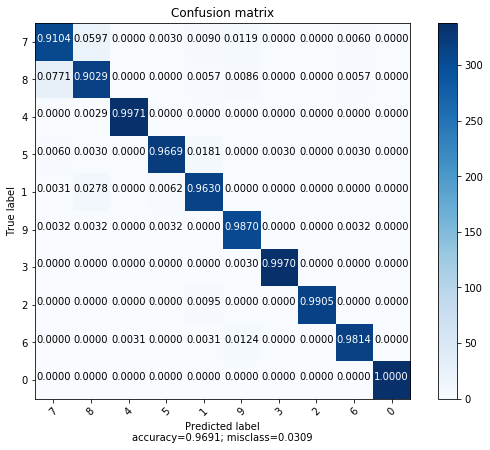

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weig...
                                        'max_depth': [3, 5, 15, 25],
     

In [26]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix


scorers = {
    'precision_score': make_scorer(precision_score, average='macro'),
    'recall_score': make_scorer(recall_score, average='macro'),
    'accuracy_score': make_scorer(accuracy_score)
}

param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [10, 20, 50, 100], 
    'max_depth': [3, 5, 15, 25],
    'max_features': [10, 20, 30, 50, 100, 200]
}

def grid_search_wrapper(clf, X_train, X_test, Y_train, Y_test, refit_score='accuracy_score'):
    """
    https://towardsdatascience.com/fine-tuning-a-classifier-in-scikit-learn-66e048c21e65
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = RandomizedSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, Y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    conf_mat = confusion_matrix(Y_test, y_pred)
    print(classification_report(Y_test, y_pred))
    plot_confusion_matrix(conf_mat, target_names=Y_test.unique())
    return grid_search

clf = RandomForestClassifier(random_state=42)
grid_search_wrapper(clf, train_set_x, test_set_x, train_set_y, test_set_y)

"""
{'criterion': 'entropy', 'max_depth': 25, 'max_features': 100, 'min_samples_split': 10}
{'min_samples_split': 10, 'max_features': 50, 'max_depth': 25, 'criterion': 'entropy'}
"""